In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import sign

In [2]:
def integrate1(f,x,y,xStop,h):
    def euler(f,x,y,h):
        k0 = h*f(x,y)
        return k0
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        h = min(h,xStop-x)
        y = y + euler(f,x,y,h)
        x = x + h
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [3]:
def r(v):
    r=np.zeros(len(v))
    X,Y=integrate1(f,x,initcond(v),xStop,h)
    y = Y[len(Y)-1]
    r[0] = y[0]
    return r

In [75]:
def newtonRaphson(r,v,tol=1.0e-9): 
    def jacobian(r,v):
        global jac
        h = 1.0e-4
        n = len(v)
        jac = np.zeros((n,n))
        r0 = r(v)
        for i in range(n):
            temp = v[i]
            v[i] = temp + h
            r1 = r(v)
            v[i] = temp
            jac[:,i] = (r1 - r0)/h
        return jac, r0
    
    for i in range (30):
        jac,r0 = jacobian(r,v)
        if math.sqrt(np.dot(r0,r0)/len(v)) < tol: return v
        dv = -r0/jac[0]
        v = v + dv
        if math.sqrt(np.dot(dv,dv)) < tol*max(max(abs(v)),1.0):
            return v

In [76]:
def initcond(v):
    return np.array([1,0,v[0],0])


In [77]:
def f(x,y):
    f = np.zeros(4)
    f[0] = y[1]
    f[1] = 2.*y[2]-2./x*y[1]
    f[2] = y[3]
    f[3] = y[0]**2.-2./x*y[3]  
    return f

In [81]:
x = 0.001
xStop = 4.
h = .0001
v = np.array([-0.92])
v = newtonRaphson(r,v,1.0e-5)

In [82]:
v

array([-0.598014])

Text(0,0.5,'y')

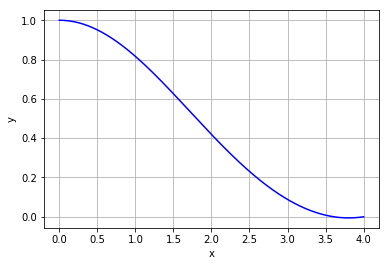

In [83]:

X,Y=integrate1(f,x,initcond(v),xStop,h)
plt.plot(X,Y[:,0],'b-')
plt.grid(True)
plt.xlabel("x"); plt.ylabel("y")
